In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
states = pd.read_csv("covid19/4.18states.csv")
abridged_counties = pd.read_csv("covid19/abridged_couties.csv")
us_confirmed = pd.read_csv("covid19/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("covid19/time_series_covid19_deaths_US.csv")

In [15]:
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [13]:
abridged_couties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [8]:
states.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [10]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [11]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


In [16]:
socio_counties = abridged_counties[['CountyName', 'StateName', 'State',
        'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'SVIPercentile', 'HPSAShortage', 
        'HPSAServedPop', 'HPSAUnderservedPop', 'SVIPercentile', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017']]

<BarContainer object of 52 artists>

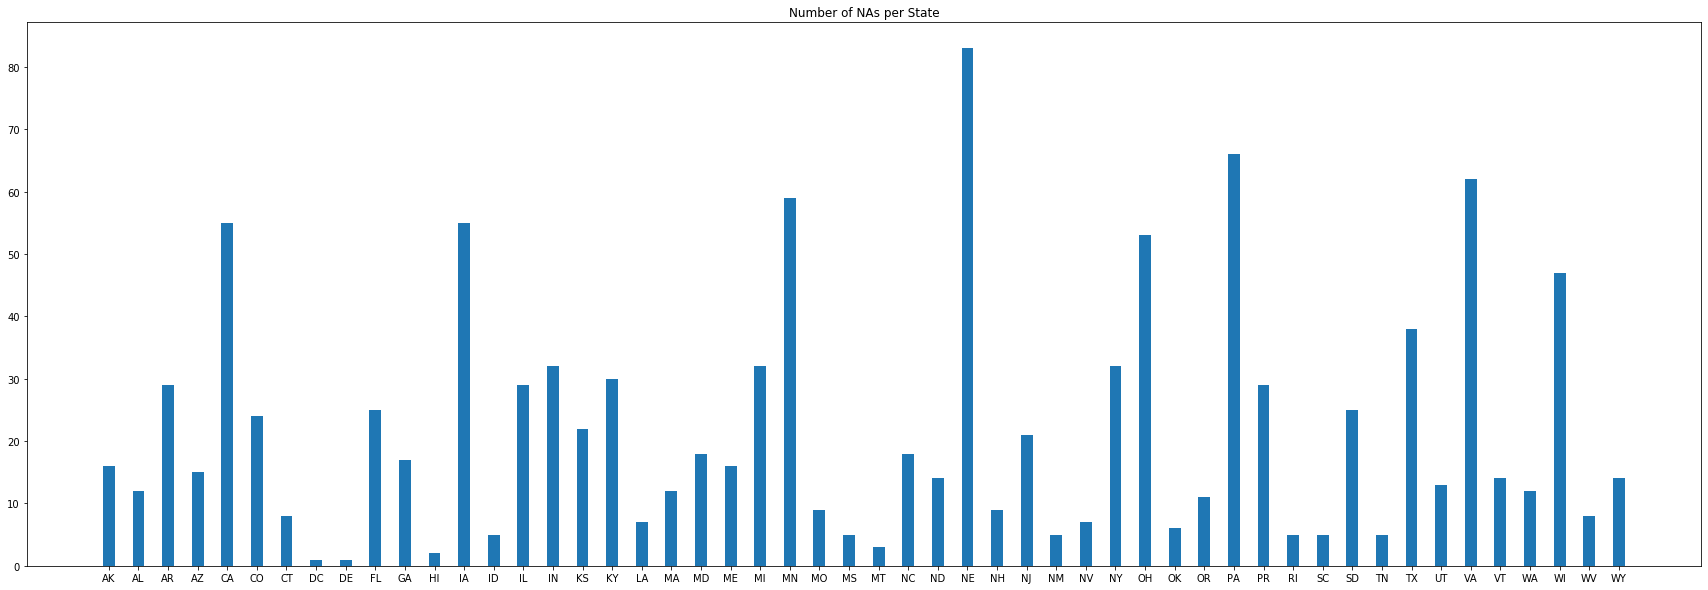

In [39]:
plt.figure(figsize=(30,10))
plt.title('Number of NAs per State')
county_nas = socio_counties[socio_counties['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

In [44]:
socio_counties['HPSAShortage'] = socio_counties['HPSAShortage'].fillna(socio_counties.groupby('StateName')['HPSAShortage'].transform('mean'))
socio_counties['HPSAServedPop'] = socio_counties['HPSAServedPop'].fillna(socio_counties.groupby('StateName')['HPSAServedPop'].transform('mean'))
socio_counties['HPSAUnderservedPop'] = socio_counties['HPSAUnderservedPop'].fillna(socio_counties.groupby('StateName')['HPSAUnderservedPop'].transform('mean'))

/Users/masonarcher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/masonarcher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/masonarcher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [55]:
socio_counties.columns[3:]

Index(['lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'SVIPercentile',
       'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'SVIPercentile',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
       'HPSAServedpop'],
      dtype='object')

In [74]:
for i in socio_counties.columns[7:]:
    socio_counties[i] = socio_counties.groupby("StateName")[i].mean()transform(lambda x: x.fillna(x.mean()))[i]

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [49]:
socio_counties['lat'].dtype

dtype('float64')

In [69]:
socio_counties

,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,SVIPercentile,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",HPSAServedpop
0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,0.4354,4.394415,22099.309091,13454.418182,0.4354,11439.0,8046.0,22099.309091
1,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,0.2162,4.394415,22099.309091,13454.418182,0.2162,54145.0,41590.0,22099.309091
2,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,0.9959,6.080000,5400.000000,18241.000000,0.9959,6681.0,4706.0,5400.000000
3,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,0.6003,2.750000,14980.000000,6120.000000,0.6003,5128.0,3389.0,14980.000000
4,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,0.4242,7.210000,31850.000000,25233.000000,0.4242,13175.0,9542.0,31850.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,0.3162,20.933333,66920.000000,73273.666667,0.3162,NaN,0.0,66920.000000
3240,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,NaN,43.784082,2209.591837,131445.612245,NaN,5152.0,2960.0,2209.591837
3241,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,NaN,43.784082,2209.591837,131445.612245,NaN,19035.0,12583.0,2209.591837
3242,New York City,NY,NaN,42.544061,-75.478200,42.535757,-75.467245,NaN,6.933987,6819.354839,20841.774194,NaN,NaN,NaN,6819.354839


In [82]:
socio_counties.groupby('StateName').mean()['SVIPercentile']

,SVIPercentile,SVIPercentile
StateName,,
AK,0.561897,0.561897
AL,0.702722,0.702722
AR,0.718023,0.718023
AS,NaN,NaN
AZ,0.846067,0.846067
CA,0.634397,0.634397
CO,0.395428,0.395428
CT,0.316962,0.316962
DC,0.596500,0.596500


In [87]:
socio_counties[(socio_counties['StateName'] == 'AK' & ~socio_counties['SVIPercentile'].isna())]

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]